# Credit Card Fraud Detection - Data Analysis

## Import Dependencies

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# setting ignore as a parameter and further adding category
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) 


## Upload Data from CSV files and create Dataframes
There are 3 Data files that will be accessed via this notebook:
*	User Information: 219KB; 18 columns and 2,000 rows of data (users_df)
*	Credit Card Information: 475 KB; 13 columns and 6,146 rows of data (cards_df)
*	Credit Card Transactions – 2.18GB; 15 columns and 24,386,900 rows of data (transactions_df)


In [2]:
#User information dataset
users_df = pd.read_csv("Resources/sd254_users.csv")
users_df.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [3]:
#Shape of the User information
users_df.shape

(2000, 18)

In [4]:
#Credit Card information dataset
cards_df = pd.read_csv("Resources/sd254_cards.csv")
cards_df.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [5]:
#Shape of the Credit Card dataset
cards_df.shape

(6146, 13)

In [6]:
# Transaction dataset
transactions_df = pd.read_csv("Resources/credit_card_transactions-ibm_v2.csv")

In [7]:
#View of Transaction Dataframe
transactions_df.head(3)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No


In [8]:
#Shape of the Transaction Dataset
transactions_df.shape

(24386900, 15)

## Fraud Detection
Which Transactions were marked as Fraudulent?

In [9]:
#Transactions marked as Fraudulent
fraud_df = transactions_df.loc[transactions_df["Is Fraud?"]=="Yes",:] 

fraud_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4099,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,Yes
4100,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,Yes
4101,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,NaN,NaN,4411,NaN,Yes
4102,0,0,2015,11,16,09:46,$248.36,Online Transaction,4872340518840476610,ONLINE,NaN,NaN,5732,NaN,Yes
4103,0,0,2015,11,16,11:20,$473.00,Online Transaction,-8566951830324093739,ONLINE,NaN,NaN,3640,NaN,Yes


In [10]:
# Wrote Fraud_df to CSV file for future use, as needed - Since transaction_df CSV file is clumbersome to execute
#fraud_df.to_csv("Resources/fraudTransactions.csv", index=False, header=True)


In [11]:
# Code to open CSV for the file created above as needed
#fraud_df = pd.read_csv("Resources/fraudTransactions.csv")


In [12]:
#Shape of fraud_df
fraud_df.shape

(29757, 15)

### Fraudulent Transaction: Form of accessing the Credit Card information
How was the transaction conducted - Chip, Online, or Swipe Transaction?

In [13]:
#Group of Fraudulent Transaction by "Use Chip"
fraud_chip_group= fraud_df.groupby(["Use Chip"])
fraud_chip_group["Is Fraud?"].count()

Use Chip
Chip Transaction       4836
Online Transaction    18349
Swipe Transaction      6572
Name: Is Fraud?, dtype: int64

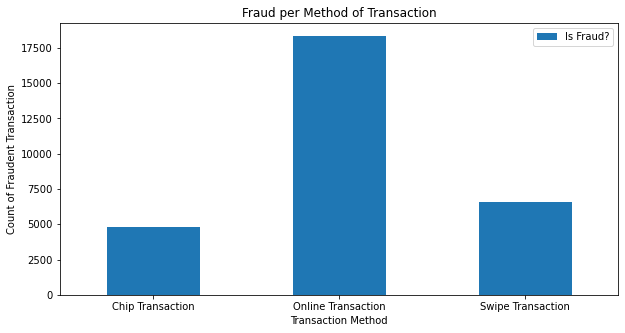

In [14]:
#Bar Chart showing which method of accessing Credit Card has a Higher count of Fraud
y_axis = fraud_chip_group["Is Fraud?"].count()


fraud_bar_chart = y_axis.plot(kind="bar", 
                               title = "Fraud per Method of Transaction", 
                               rot =0, 
                               figsize=(10,5))
fraud_bar_chart.set_ylabel("Count of Fraudent Transaction")
fraud_bar_chart.set_xlabel("Transaction Method")

fraud_bar_chart.legend(loc="best")
plt.savefig("images/fraud_method.png")

### Fraudulent Transaction: Popular Merchant Category
Which business category was most likely to be the target of fraudulent transactions?

In [15]:
#Group of Fraudulent Transaction by "MCC"
fraud_MCC_group= fraud_df.groupby("MCC")
MCC_count = fraud_MCC_group.count().reset_index(drop=False)

#Created DataFrame for the MCC_count
MCC_count_df= pd.DataFrame(MCC_count[["MCC", "Is Fraud?"]])

#Sorted the Fraud by Merchant Category Code
MCC_top_count_df= MCC_count_df.sort_values("Is Fraud?", ascending=False)
MCC_top_count_df

,MCC,Is Fraud?
49,5311,4824
47,5300,2201
48,5310,2152
40,4829,1607
68,5912,1057
...,...,...
85,7802,15
78,7230,14
80,7531,11
92,8041,5


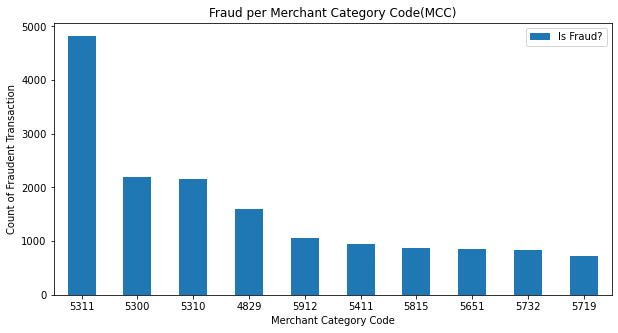

In [16]:
#Top Ten Merchant Category for Fraudulent Transaction
y_axis = MCC_top_count_df.head(10)


fraud_barMCC_chart = y_axis.plot(kind="bar",
                                 x="MCC",
                               title = "Fraud per Merchant Category Code(MCC)", 
                               rot =0, 
                               figsize=(10,5))
fraud_barMCC_chart.set_ylabel("Count of Fraudent Transaction")
fraud_barMCC_chart.set_xlabel("Merchant Category Code")

fraud_barMCC_chart.legend(loc="best")
plt.savefig("images/fraud_MCC.png")

Based on manual search, the [MCC](https://fs.fldfs.com/iwpapps/pcard/docs/MCCs.pdf) for the top 10 Fraudulent Transactions are as follows:
* 5311 - Department Stores
* 5300 - Wholesale Clubs
* 5310 - Discount Stores
* 4829 - Wire Transfer Money Orders, Money Transfer
* 5912 - Drug Stores and Pharmacies
* 5411 - Grocery Stores, Supermarkets
* 5815 - Digital Goods: Books, Movies, Music
* 5651 - Family Clothing Stores
* 5732 - Electronics Sales
* 5719 - Miscellaneous House Furnishing Specialty Shops

### Fraudulent Transaction: Less Popular Merchant Category
Which business category had fewer fraudulent transactions?

In [17]:
#Sorted the Fraud by Merchant Category Code
MCC_bottom_count_df= MCC_count_df.sort_values("Is Fraud?", ascending=True).head(10)
MCC_bottom_count_df

,MCC,Is Fraud?
94,8049,3
92,8041,5
80,7531,11
78,7230,14
85,7802,15
83,7549,16
79,7349,17
90,8011,20
60,5722,21
96,8099,21


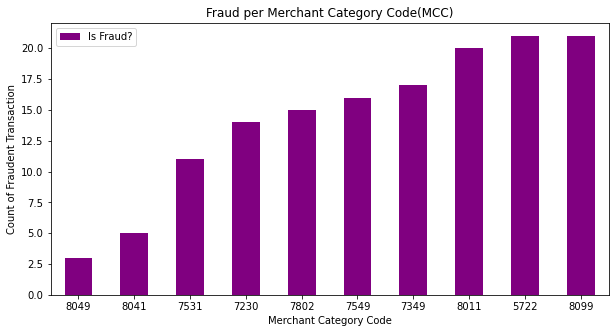

In [18]:
#Bottom Ten Merchant Category for Fraudulent Transaction

fraud_lowMCC_chart = MCC_bottom_count_df.plot(kind="bar",
                                              x="MCC",
                                              title = "Fraud per Merchant Category Code(MCC)",
                                              rot =0,
                                              color = "purple",
                                              figsize=(10,5))

fraud_lowMCC_chart.set_ylabel("Count of Fraudent Transaction")
fraud_lowMCC_chart.set_xlabel("Merchant Category Code")

fraud_lowMCC_chart.legend(loc="best")
plt.savefig("images/fraud_MCC_low.png")

Based on manual search, the [MCC](https://fs.fldfs.com/iwpapps/pcard/docs/MCCs.pdf) for the bottom 10 Less Fraudulent Transactions are as follows:
* 8049 - Podiatrists and Chiropodists
* 8041 - Chiropractors
* 7531 - Automotive Body Repair Shops
* 7230 - Barber and Beauty Shops
* 7802 - Government Licensed Horse/Dog Racing 
* 7549 - Towing Services
* 7349 - Cleaning and Maintenance, Janitorial Services
* 8011 - Doctors and Physicians (Not Elsewhere Classified)
* 5722 - Household Appliance Stores
* 8099 - Medical Services and Health Practitioners (Not Elsewhere Classified)

### Fraudulent Transaction: By User Age
Does the likelihood of fraud occurring matters by age?

In [19]:
# Resetting the index of the User table so that it can be used in the assessment of fraud by age

new_user_df = users_df.reset_index()
new_user_df = new_user_df.rename(columns={"index":"User"})
new_user_df.head(3)

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5


In [20]:
#Count of unique age
new_user_df["Current Age"].nunique()

80

In [21]:
#Youngest Current Age in the Dataset
new_user_df["Current Age"].min()

18

In [22]:
#Max Current Age in the Dataset
new_user_df["Current Age"].max()

101

In [23]:
# Merge two dataframes using a left join
fraud_user = pd.merge(fraud_df, new_user_df, on="User",how="left" )
fraud_user.head(3)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
2,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5


In [24]:
fraud_user.shape

(29757, 33)

In [25]:
fraud_user.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'Person', 'Current Age', 'Retirement Age',
       'Birth Year', 'Birth Month', 'Gender', 'Address', 'Apartment', 'City',
       'State', 'Zipcode', 'Latitude', 'Longitude',
       'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt',
       'FICO Score', 'Num Credit Cards'],
      dtype='object')

In [26]:
#Converting Yearly Income - Person, Total Debt, and Credit Limit object fields to number to do other assessment
#Task: remove '$' signs then change to an integer

fraud_user["Yearly Income - Person"] =fraud_user["Yearly Income - Person"].str.replace('$','')
fraud_user["Total Debt"] = fraud_user["Total Debt"].str.replace('$','')
fraud_user["Amount"] = fraud_user["Amount"].str.replace('$','')


#Changing the datatype of the numeric data columns in the dataframe
fraud_user = fraud_user.astype({"Yearly Income - Person":"int64",
                               "Total Debt":"int64",
                               "Amount":"float64"})

fraud_user.head(3)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,0,2015,11,15,12:55,287.13,Online Transaction,-8194607650924472520,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,59696,127613,787,5
1,0,0,2015,11,15,13:19,2.41,Online Transaction,-7759074308363763111,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,59696,127613,787,5
2,0,0,2015,11,16,09:41,50.81,Online Transaction,-551332107213382088,ONLINE,...,La Verne,CA,91750,34.15,-117.76,$29278,59696,127613,787,5


In [27]:
#Since the count of unique age is large - the age will be binned
bins = [0,29,39,49,59,69,79,89,105]

# Create the names for the bins
group_names = ["20's", "30's", "40's", "50's", "60's","70's","80's","90+"]

# Slice the data and place it into bins
fraud_user["Fraud Age Group"] = pd.cut(fraud_user["Current Age"], bins, labels=group_names, include_lowest=True)

# Creating a group based off of the bins
fraud_age_group_df = fraud_user.groupby("Fraud Age Group")


In [28]:
fraud_age_group_df["Is Fraud?"].count()

Fraud Age Group
20's     309
30's    3804
40's    6997
50's    7157
60's    5689
70's    2701
80's    2523
90+      577
Name: Is Fraud?, dtype: int64

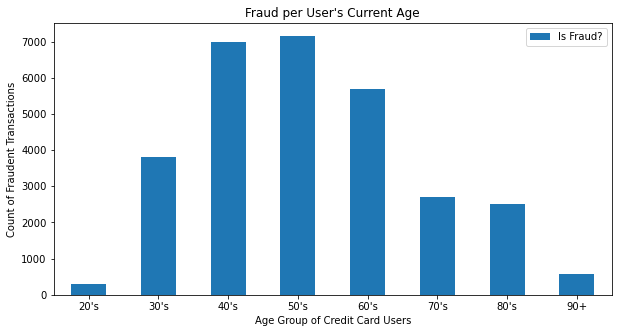

In [29]:
#Charting Fraud per User's Current Age Group

y_axis = fraud_age_group_df["Is Fraud?"].count()


fraud_barAge_chart = y_axis.plot(kind="bar",
                                 x="MCC",
                               title = "Fraud per User's Current Age", 
                               rot =0, 
                               figsize=(10,5))
fraud_barAge_chart.set_ylabel("Count of Fraudent Transactions")
fraud_barAge_chart.set_xlabel("Age Group of Credit Card Users")

fraud_barAge_chart.legend(loc="best")
plt.savefig("images/fraud_age.png")

### Fraudulent Transaction: By User Age based on Yearly Income and Total Debt

In [30]:
fraud_age_group_df["Yearly Income - Person"].sum()

Fraud Age Group
20's     15585959
30's    180651426
40's    313036318
50's    349242449
60's    253481732
70's    103971487
80's     81038484
90+      21212171
Name: Yearly Income - Person, dtype: int64

In [31]:
fraud_age_group_df["Total Debt"].sum()

Fraud Age Group
20's     23367795
30's    272581984
40's    437755769
50's    521232547
60's    294294868
70's     41974215
80's      3673740
90+        611894
Name: Total Debt, dtype: int64

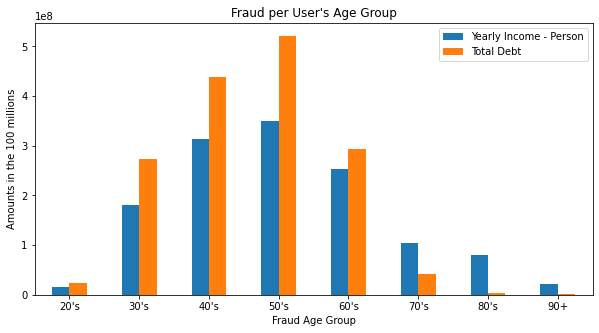

In [32]:
#Calculation of the Income and Debt per Age Group
fraud_debt_income = fraud_age_group_df[["Yearly Income - Person", "Total Debt"]].aggregate(np.sum)

chart = fraud_debt_income.plot(kind="bar",
                               title = "Fraud per User's Age Group",                     
                               rot =0, 
                               figsize=(10,5))
chart.set_ylabel("Amounts in the 100 millions")
#fraud_debt_income.set_ylabel("Count of Fraudent Transaction")

plt.savefig("images/fraud_age_income_debt_credit.png")

In [33]:
#Changing the format of the columns for readability
fraud_debt_income["Yearly Income - Person"] = fraud_debt_income["Yearly Income - Person"].map("${:,.2f}".format)
fraud_debt_income["Total Debt"] = fraud_debt_income["Total Debt"].map("${:,.2f}".format)

fraud_debt_income

,Yearly Income - Person,Total Debt
Fraud Age Group,,
20's,"$15,585,959.00","$23,367,795.00"
30's,"$180,651,426.00","$272,581,984.00"
40's,"$313,036,318.00","$437,755,769.00"
50's,"$349,242,449.00","$521,232,547.00"
60's,"$253,481,732.00","$294,294,868.00"
70's,"$103,971,487.00","$41,974,215.00"
80's,"$81,038,484.00","$3,673,740.00"
90+,"$21,212,171.00","$611,894.00"


### Fraudulent Transaction: Card Type (Debit vs Credit)

Compare Fraud with Card info: Card Brand Face Off(Which is the better Card?); Debit/Credit

In [34]:
fraud_df.head(2)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4099,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,Yes
4100,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,Yes


In [35]:
#Creating new_fraud_df with limited column information
new_fraud_df= fraud_df[["User","Card", "Year","Month","Day", "Time", "Amount", "Use Chip","Merchant City", "MCC"]]

#Renamed column to match cards_df dataframe
new_fraud_df= new_fraud_df.rename(columns={"Card":"CARD INDEX"})

new_fraud_df.head(2)

,User,CARD INDEX,Year,Month,Day,Time,Amount,Use Chip,Merchant City,MCC
4099,0,0,2015,11,15,12:55,$287.13,Online Transaction,ONLINE,3001
4100,0,0,2015,11,15,13:19,$2.41,Online Transaction,ONLINE,5651


In [36]:
cards_df.head(2)

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No


In [37]:
cards_df.shape

(6146, 13)

In [38]:
fraud_cards_df=pd.merge(new_fraud_df,cards_df, on=["User","CARD INDEX"],how="left")
fraud_cards_df.head()

,User,CARD INDEX,Year,Month,Day,Time,Amount,Use Chip,Merchant City,MCC,...,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,2015,11,15,12:55,$287.13,Online Transaction,ONLINE,3001,...,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,0,2015,11,15,13:19,$2.41,Online Transaction,ONLINE,5651,...,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
2,0,0,2015,11,16,09:41,$50.81,Online Transaction,ONLINE,4411,...,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
3,0,0,2015,11,16,09:46,$248.36,Online Transaction,ONLINE,5732,...,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
4,0,0,2015,11,16,11:20,$473.00,Online Transaction,ONLINE,3640,...,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No


In [39]:
fraud_cards_df.columns

Index(['User', 'CARD INDEX', 'Year', 'Month', 'Day', 'Time', 'Amount',
       'Use Chip', 'Merchant City', 'MCC', 'Card Brand', 'Card Type',
       'Card Number', 'Expires', 'CVV', 'Has Chip', 'Cards Issued',
       'Credit Limit', 'Acct Open Date', 'Year PIN last Changed',
       'Card on Dark Web'],
      dtype='object')

#### FRAUD OCCURENCE BY CARD BRAND

In [40]:
grouped_card_brand = fraud_cards_df.groupby(["Card Brand"])
grouped_card_brand["Card Brand"].count()

Card Brand
Amex           2070
Discover       1046
Mastercard    15815
Visa          10826
Name: Card Brand, dtype: int64

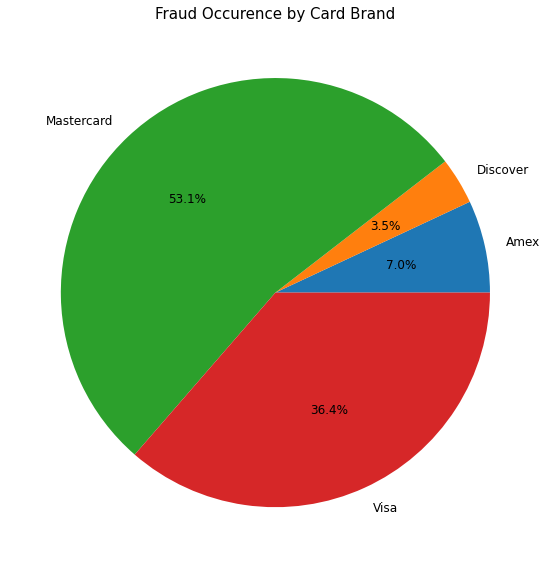

In [41]:
# Plot of Card Brands based on Fraud Occurence
fraud_card_brand = grouped_card_brand["Card Brand"].count().\
        plot.pie(autopct="%1.1f%%",figsize=(8, 8), 
        ylabel = '',textprops={'size': 'large'})

fraud_card_brand.set_title("Fraud Occurence by Card Brand", size = 15)

plt.savefig("images/pie_card_brand.png")
plt.tight_layout()

#### FRAUD OCCURENCE BY CARD TYPE

In [42]:
grouped_fraud_cards= fraud_cards_df.groupby(["Card Type"])
card_pie = grouped_fraud_cards["Card Type"].count()

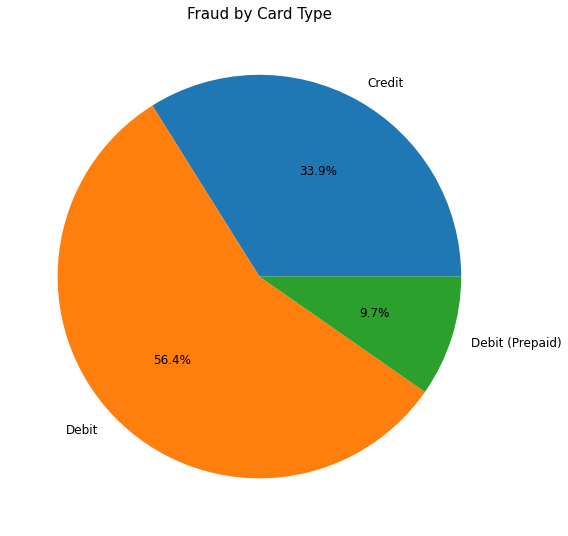

In [43]:
# Plot of Card Types based on Fraud Occurence

fraud_card_pie = card_pie.plot.pie(autopct="%1.1f%%",figsize=(8, 8), 
                                   ylabel = '',textprops={'size': 'large'})
fraud_card_pie.set_title("Fraud by Card Type", size =15)

plt.savefig("images/pie_card_type.png")
plt.tight_layout()

### Fraudulent Transaction: Demography


In [44]:
fraud_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4099,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,Yes
4100,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,Yes
4101,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,NaN,NaN,4411,NaN,Yes
4102,0,0,2015,11,16,09:46,$248.36,Online Transaction,4872340518840476610,ONLINE,NaN,NaN,5732,NaN,Yes
4103,0,0,2015,11,16,11:20,$473.00,Online Transaction,-8566951830324093739,ONLINE,NaN,NaN,3640,NaN,Yes


In [45]:
#Creating a smaller DF based on the columns needed
mini_fraud_df = fraud_df[["Merchant City","Is Fraud?"]]

#Grouping the smaller DF by Merchant City
demo_fraud = mini_fraud_df.groupby(["Merchant City"]).count()

#Turning the result into a dataframe for plotting
demographic_fraud = pd.DataFrame(demo_fraud)
demographic_fraud 

,Is Fraud?
Merchant City,
Abbeville,1
Aberdeen,3
Aberdeen Proving Ground,1
Abilene,1
Abingdon,3
...,...
Zeeland,3
Zelienople,1
Zellwood,1


In [46]:
#Top 5 locations with the most fraudulent Transaction

top_locations = demographic_fraud.sort_values("Is Fraud?", ascending=False).reset_index(drop=False).head(5)
top_locations =top_locations.set_index("Merchant City")

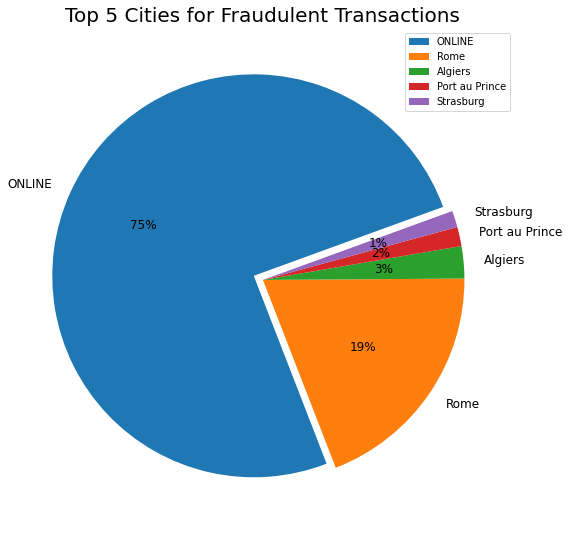

In [47]:
#Plot of Top 5 Cities for Fraudulent Transactions
explode = (0.05,0,0,0,0)


location_pie = top_locations.plot.pie(autopct="%1.0f%%",figsize=(8, 8), 
                                      startangle=20, y="Is Fraud?",
                                      explode=explode, textprops={'size': 'large'})

location_pie.set_title("Top 5 Cities for Fraudulent Transactions", size =20)
location_pie.set_ylabel('')

plt.savefig("images/pie_fraud_location.png")

plt.tight_layout()